
# KNN -  K Nearest Neighbors - Classification via Scikit-Learn

The Scikit-Learn example can be found here
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [5]:
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


#### load the dataset

In [34]:
from palmerpenguins import load_penguins
df = load_penguins()
df.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [35]:
df = load_penguins().dropna()
df.head(20)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


#### Lets make a KNN model to clasify a given penguin based on his or her species.   

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

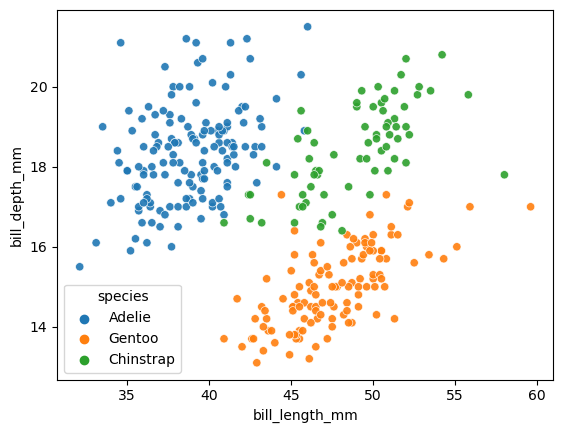

In [36]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',hue='species',data=df,alpha=0.9)

## Train|Test Split and Scaling Data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
X = df.loc[:,'bill_length_mm':'bill_depth_mm']
y = df['species']

In [39]:
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [40]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=85)

In [42]:
scaler = StandardScaler()

In [43]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance.
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual feat

In [44]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

## Model Evaluation

In [48]:
y_pred = knn_model.predict(scaled_X_test)

In [49]:
y_pred

array(['Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.98

In [52]:
confusion_matrix(y_test,y_pred)

array([[45,  0,  0],
       [ 1, 19,  0],
       [ 0,  1, 34]])

## Elbow Method for Choosing Reasonable K Values

In [53]:
test_error_rates = []


for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

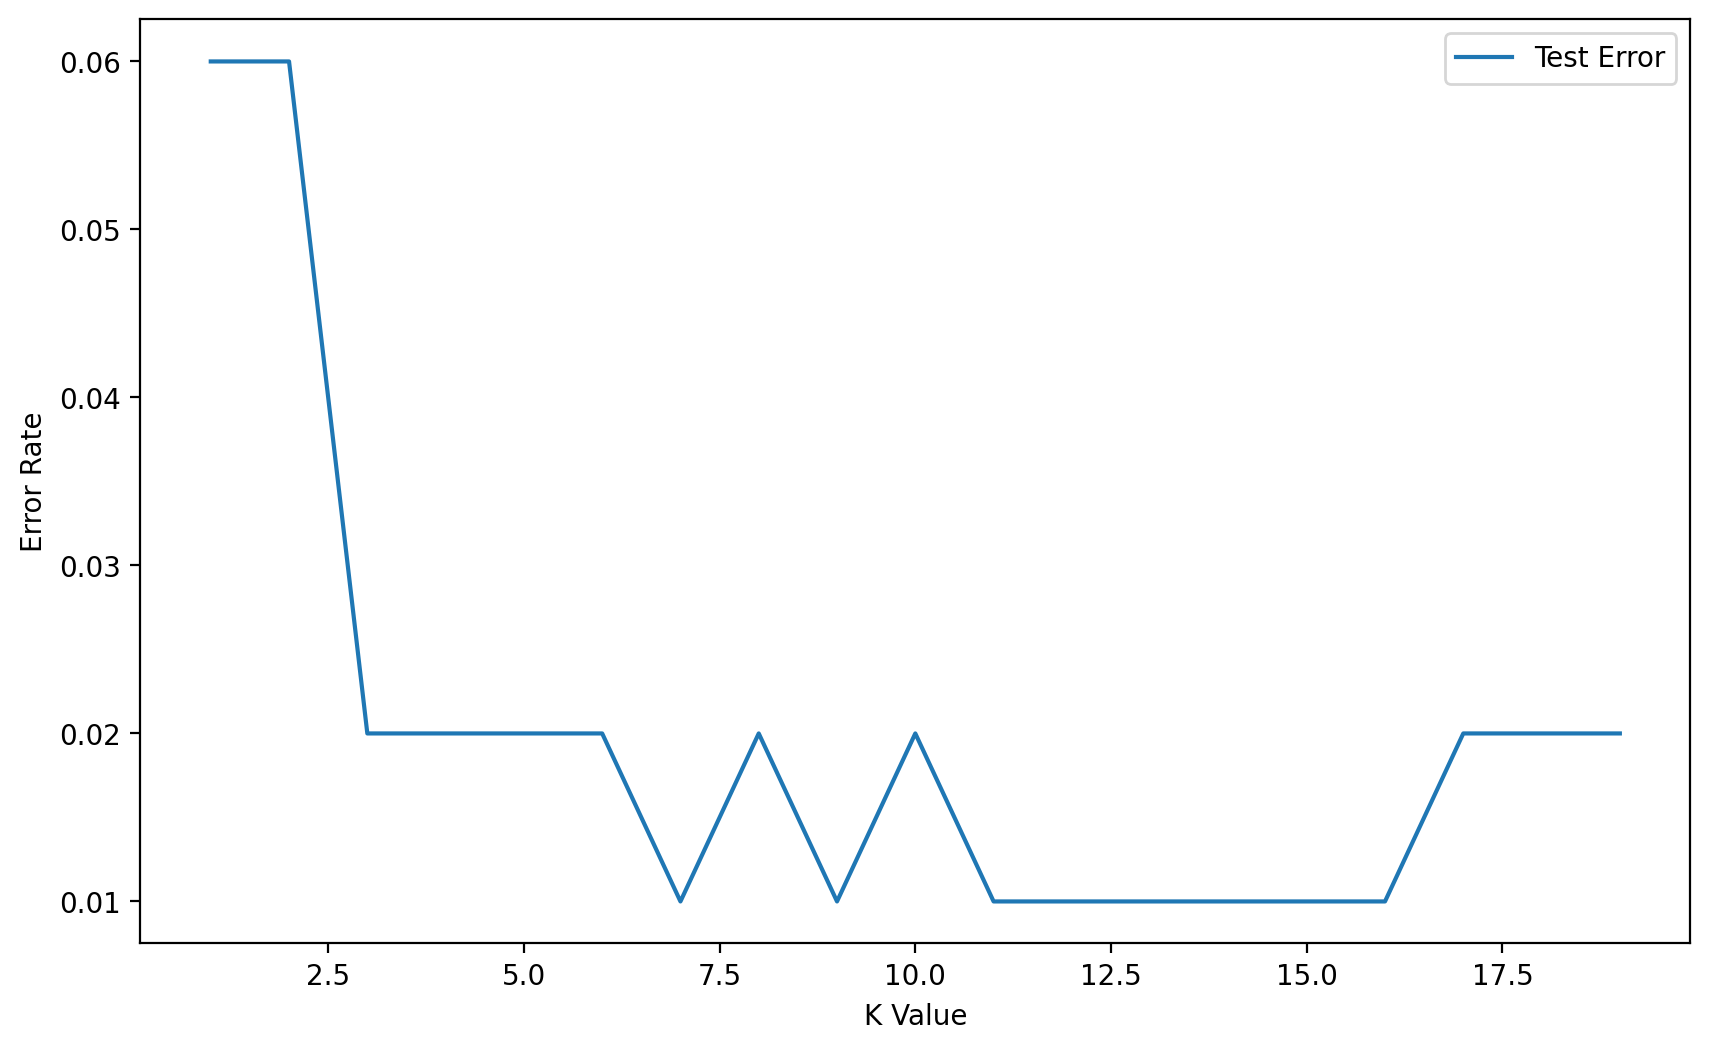

In [54]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")